In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
dataset = pd.read_csv(r"C:\Users\eabhaya\Desktop\ASSIGNMENTS  EXCELR\delivery_time.csv")
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


<Axes: xlabel='Delivery Time', ylabel='Density'>

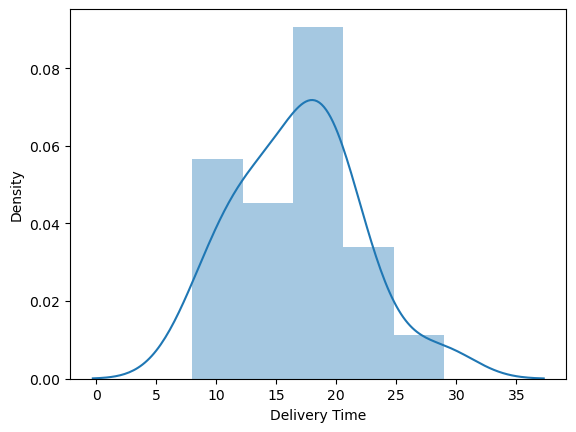

In [5]:
sns.distplot(dataset['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

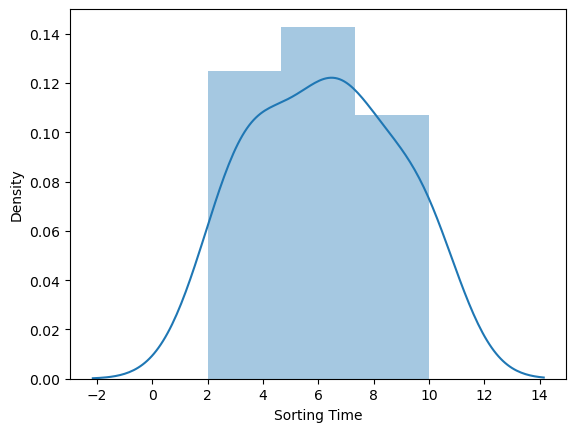

In [6]:
sns.distplot(dataset['Sorting Time'])

In [7]:
dataset['Delivery Time'].describe()

count    21.000000
mean     16.790952
std       5.074901
min       8.000000
25%      13.500000
50%      17.830000
75%      19.750000
max      29.000000
Name: Delivery Time, dtype: float64

<Axes: >

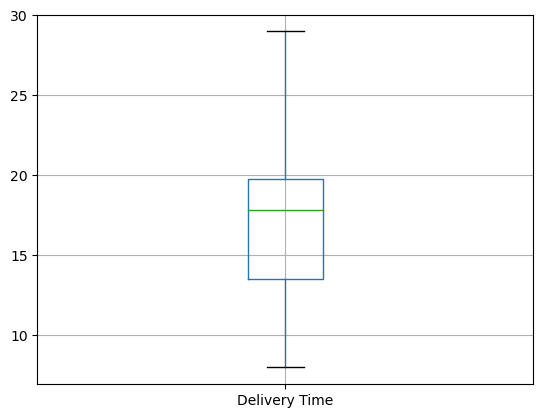

In [9]:
dataset.boxplot(['Delivery Time'])

<Axes: >

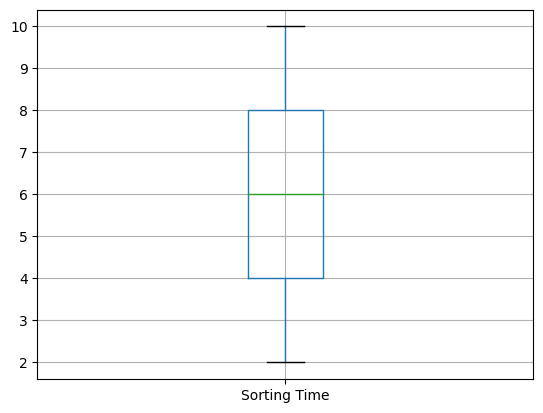

In [10]:
dataset.boxplot(['Sorting Time'])

In [11]:
#renaming the datasets
dataset = dataset.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
dataset.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [12]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


# Fitting the model

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

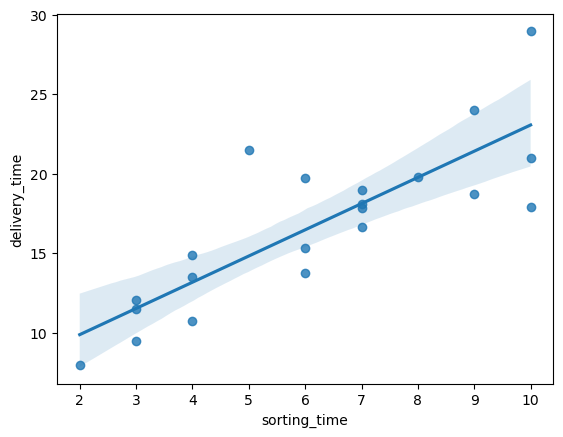

In [13]:
sns.regplot(x = dataset['sorting_time'],y = dataset['delivery_time'])

In [15]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

In [16]:
#coeffiecents 
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [17]:
#t and p-Values
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

# Checking Accuracy of Model using r2

In [19]:
#R squared values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

## model predictions

In [20]:
#manual prediction
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [21]:
# Automatic Prediction
new_data=pd.Series([5,10,15,20,25])
new_data

0     5
1    10
2    15
3    20
4    25
dtype: int64

In [22]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,10
2,15
3,20
4,25


In [23]:
model.predict(data_pred)

0    14.827833
1    23.072933
2    31.318032
3    39.563132
4    47.808231
dtype: float64